In [1]:
import pandas as pd
feats = pd.read_csv('./data/aps_failure_training_feats.csv')
y = pd.read_csv('./data/aps_failure_training_target.csv')

In [2]:
from sklearn.preprocessing import StandardScaler
X =StandardScaler().fit_transform(feats,y)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

model = Sequential()
model.add(Dense(units=64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(X_train,y_train,verbose=0,validation_split=0.2,batch_size=20,epochs=100)

Instructions for updating:
Use tf.cast instead.


In [6]:
print(f"Null accuracy is {y_test['class'].value_counts(normalize=True)[0] * 100:.4f}")

Null accuracy is 98.3333


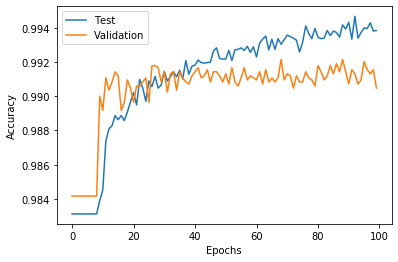

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Test','Validation'])
plt.show()

In [8]:
result = model.evaluate(x=X_test,y=y_test)
print(f"Test loss is {result[0]:.4f} and Test accuracy is {result[1]*100:.4f}")


18000/18000 [==============================] - 0s 27us/step
Test loss is 0.0462 and Test accuracy is 99.2667


In [9]:
y_pred = model.predict(X_test)
from sklearn.metrics import roc_auc_score,confusion_matrix
print(f"ROC Score is {roc_auc_score(y_test,y_pred):.4f}")

ROC Score is 0.9500


In [10]:
y_pred_proba =  y_pred > 0.5
cm=confusion_matrix(y_test['class'],y_pred_proba)

In [11]:
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
TP = cm[1,1]

In [12]:
sensitivity = TP/(TP+FN)
specifity = TN/(TN+FP)
precision = TP/(TP+FP)
fpr = 1-specifity
print(f"Sensitivity:{sensitivity:.4f} Specifity:{specifity:.4f} Precision:{precision:.4f} FalsePositiveRate:{fpr:.4f}")

Sensitivity:0.7800 Specifity:0.9963 Precision:0.7800 FalsePositiveRate:0.0037


In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

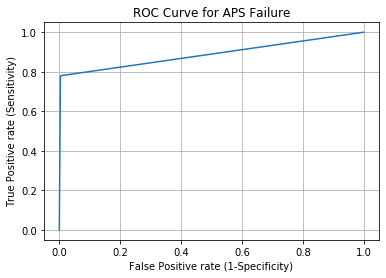

In [14]:
plt.plot(fpr,tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()